<a href="https://colab.research.google.com/github/Art-phys/Lesson_HF_LR_Unit1/blob/main/Lesson_HF_RL_Unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Блок 1: Тренировка обучающего агента с глубоким подкреплением 🤖
![Cover](https://github.com/huggingface/deep-rl-class/blob/main/unit1/assets/img/thumbnail.png?raw=true)

В этой записной книжке вы обучите своего **первого агента по обучению глубокому подкреплению** агента Лунного модуля, который научится **правильно приземляться на Луну 🌕**.
Используя [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) библиотеку глубокого обучения с подкреплением, можно делится ими с сообществом и экспериментировать с различными конфигурациями.

⬇️ Вот пример того, чего **вы достигнете всего за пару минут.** ⬇️


In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/ThomasSimonini/ppo-LunarLander-v2/resolve/main/replay.mp4" type="video/mp4"></video>

### Окружающая среда 🎮
- [LunarLander-v2](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

### Используемая библиотека 📚
- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)

## Цели этой записной книжки 🏆
В конце этой записной книжки вы будите:
- Уметь пользоваться **тренажерным залом (Gym)**, библиотекой окружающей среды.
- Уметь использовать **Stable-Baselines3**, библиотекой глубокого обучения с подкреплением.
- Иметь возможность **отправить своего обученного агента в центр** с хорошим видеоповтором и оценочным баллом 🔥 .

## Эта тетрадь взята из курса обучения с глубоким подкреплением
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/deep-rl-course-illustration.jpg" alt="Deep RL Course illustration"/>

В этом бесплатном курсе мы будем:

- 📖 Изучать глубокое обучение с подкреплением в **теории и практике**.
- 🧑 💻 Учится **использовать известные библиотеки Deep RL**, такие как Stable Baselines3, RL Baselines3 Zoo, CleanRL и Sample Factory 2.0.
- 🤖 Тренировать **агентов в уникальных условиях**

ОТ АВТОРОВ:

И еще проверьте 📚 учебную программу 👉 https://simoninithomas.github.io/deep-rl-course

Не забудьте **<a href="http://eepurl.com/ic5ZUD ">подписаться на курс</a>** (мы собираем вашу электронную почту, чтобы иметь возможность **отправлять вам ссылки при публикации каждого блока и предоставлять вам информацию о задачах и обновлениях).**

Лучший способ поддерживать связь и задавать вопросы - присоединиться к нашему серверу discord, чтобы обмениваться информацией с сообществом и с нами 👉🏻 https://discord.gg/ydHrjt3WP5

## Предварительные условия 🏗️
Прежде чем погрузиться в блокнот, вам нужно:

🔲 📝 **Ознакомиться с [Unit 0](https://huggingface.co/deep-rl-course/unit0/introduction)**, который дает вам всю **информацию о курсе** 🤗

🔲  📚 **Развивайте понимание основ обучения с подкреплением** (MC, TD, гипотеза вознаграждения ...) с помощью [чтения блока 1](https://huggingface.co/deep-rl-course/unit1/introduction ).

## Небольшой обзор того, что такое глубокое обучение с подкреплением 📚
<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

Давайте сделаем небольшой обзор того, что мы узнали в первом блоке:
- Обучение с подкреплением - это **вычислительный подход к обучению на основе действия**. Мы создаем агента, который учится у окружающей среды, **взаимодействуя с ней методом проб и ошибок** и получая вознаграждение (отрицательное или положительное) в качестве обратной связи.

- Цель любого агента RL состоит в том, чтобы **максимизировать ожидаемое совокупное вознаграждение** (также называемое ожидаемой доходностью), потому что RL основана на гипотезе награды _(reward)_, которая заключается в том, что все цели могут быть описаны как максимизация ожидаемого совокупного вознаграждения.

- Процесс RL представляет собой цикл, **который содержит последовательность состояния, действия, вознаграждения и следующего состояния**.

- Чтобы рассчитать ожидаемое совокупное вознаграждение (ожидаемый доход), **мы уменьшаем(занижаем) локальные вознаграждения**: награды, которые приходят раньше (в начале игры), с большей вероятностью произойдут, поскольку они более предсказуемы, чем долгосрочное будущее вознаграждение.

- Чтобы решить проблему RL, мы хотим **найти оптимальную политику**; политика - это "мозг" искусственного интеллекта, который подскажет агенту, какие действия предпринять в данном состоянии. Оптимальный - это тот, который дает нам действия, максимизирующие ожидаемую отдачу.

Есть **два** способа найти свою оптимальную политику:
- Путем **непосредственного обучения политике**: методы, основанные на политике.
- Путем **обучения функции значения**, которая сообщает нам ожидаемый доход, который агент получит в каждом состоянии, и использует эту функцию для определения нашей политики: методы, основанные на значении.

Наконец, мы говорили о глубоком RL, потому что **мы вводим глубокие нейронные сети для оценки действия, которое необходимо предпринять (на основе политики), или для оценки значения состояния (на основе ценности), отсюда и название "глубокий".**

# Обучение агента с глубоким подкреплением и загрузка его в центр 🚀


## Получить сертификат
Чтобы подтвердить выполнение задания для [процесса сертификации](https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process ), вам нужно поместить вашу обученную модель в концентратор и **получить результат >= 200**.

Чтобы узнать свой результат, перейдите в [таблицу лидеров](https://hugging face.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard ) и найдите свою модель, **результат = mean_reward - std_reward**

Для получения дополнительной информации о процессе сертификации ознакомьтесь с этим разделом 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

## Установка графического процессора 💪
- Чтобы **ускорить обучение агента, необходимо использовать графический процессор**, для чего перейдите к `Runtime > Change Runtime type`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step1.jpg" alt="GPU Step 1">

- `Hardware Accelerator > GPU`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step2.jpg" alt="GPU Step 2">

## Установка зависимостей и создание виртуального экрана 🔽
Первый шаг - установка зависимостей:

- `gym[box2D]`: содержит среду Lunar Lander-v2 🌛 (мы используем `gym==0.21`)
- `stable-baselines3[extra]`: Библиотека обучения с глубоким подкреплением.
- `huggingface_sb3`: Дополнительный код для Stable-baselines 3 для загрузки моделей из Hugging Face 🤗 Hub.

Чтобы упростить задачу, мы создали скрипт для установки всех этих зависимостей.

In [ ]:
!apt install swig cmake

## Установка рекомендуемых зависимостей


In [ ]:
!pip install -r https://huggingface.co/spaces/ThomasSimonini/temp-space-requirements/raw/main/requirements/requirements-unit1.txt


Чтобы иметь возможность отображать среду, с помощью colab, нам нужен виртуальный экран, следующая ячейка установит библиотеки виртуальных экранов:

In [ ]:
!sudo apt-get update
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

*Чтобы убедиться, что новые установленные библиотеки используются, иногда требуется перезапустить среду выполнения notebook. Следующая ячейка приведет к сбою среды выполнения, поэтому вам нужно будет снова подключиться и запустить код, начиная отсюда. Благодаря этому трюку мы сможем запустить наш виртуальный экран.*

In [ ]:
import os
os.kill(os.getpid(), 9)

In [4]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Импорт пакетов(библиотек)  📦

Одна дополнительная библиотека, которую мы импортируем, - это **huggingface_hub**, чтобы иметь возможность загружать обученные модели из концентратора.

**Hugging Face Hub** 🤗 работает как сервер, где любой желающий может делиться моделями и наборами данных и изучать их. В нем есть управление версиями, метрики, визуализации и другие функции, которые позволяют легко сотрудничать с другими.

Вы можете увидеть здесь все доступные модели обучения с глубоким подкреплением

In [5]:
import gym

from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env

## Что такое тренажерный зал и как он работает 🤖

🏋 Библиотека среды(environment) называется Gym. Тренажерный зал часто используется для глубокого обучения с подкреплением.

Библиотека тренажерного зала предоставляет две возможности:
1. Интерфейс, который позволяет создавать среды RL;
2. Набор сред (gym-control, atari, Box2D...).

## Цикл RL:

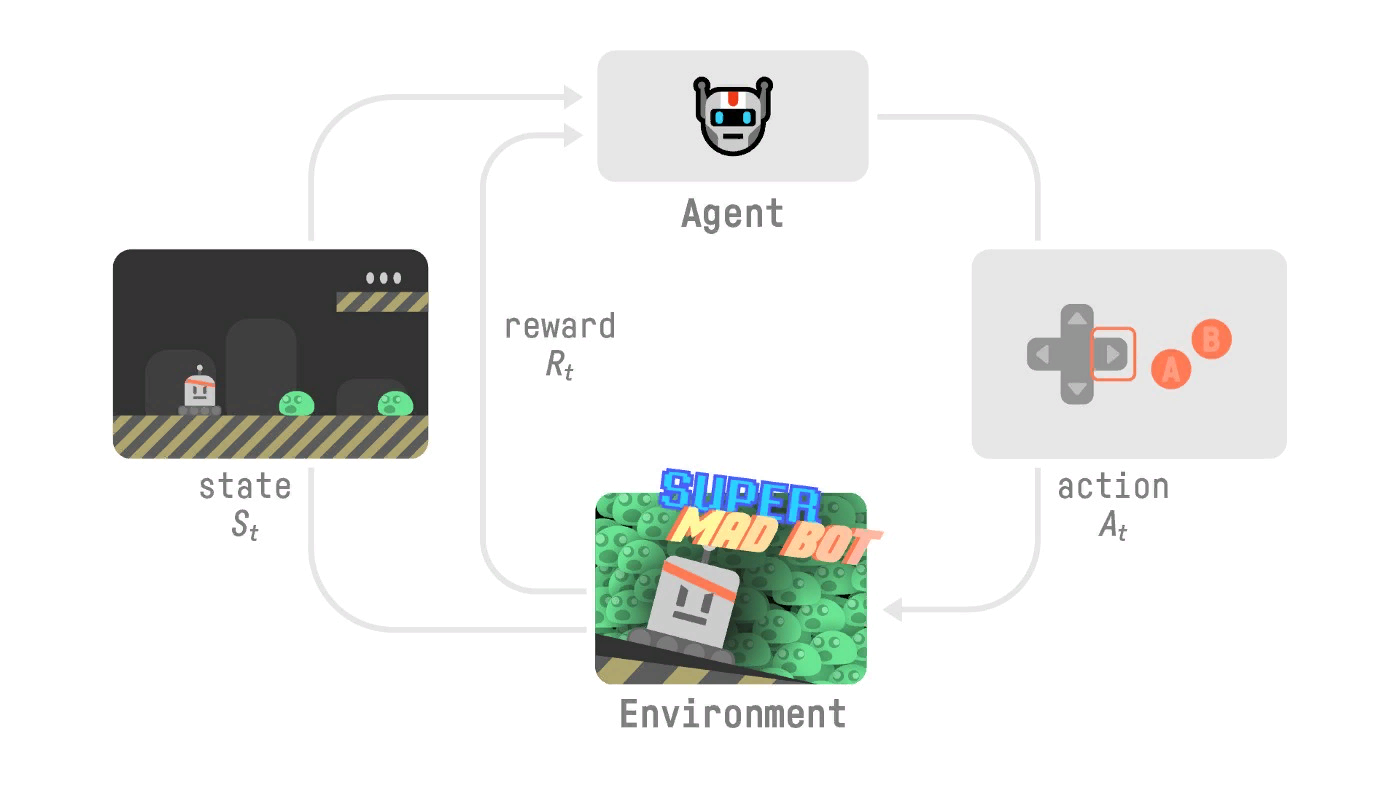

***На каждом шаге:***

*   Наш агент получает **состояние S0** из окружения — мы получаем первый кадр нашей игры (окружения).
*   Основываясь на этом **состоянии S0**, Агент выполняет **действие A0** — наш агент переместится вправо.
*   Среда перейдет в **новое состояние S1** — новый фрейм.
Если Агент не мертв, окружающая среда дает Агенту некоторую **награду R1** —положительная награда +1.

***С тренажерным залом:***

1️⃣ Мы создаем нашу среду с помощью: `gym.make()`

2️⃣ Мы возвращаем среду в исходное состояние с помощью : `observation = env.reset()`

*На каждом шаге:*

3️⃣ Получаем **действие Агента** (action), используя нашу модель (в нашем примере мы выполняем случайное действие)

4️⃣ Используя `env.step(action)`, мы выполняем это действие в среде и получаем 
*   `observation` наблюдение: Новое состояние на шаге (st+1)
*   `reward` награда: Награда, которую мы получаем после выполнения действия (action)

*   `done` : Указывает, закончился ли эпизод
*   `info` информация: Словарь, который предоставляет дополнительную информацию (зависит от среды).

*Если эпизод закончен:*

*   Мы возвращаем среду в исходное состояние с помощью `observation = env.reset()`

In [ ]:
import gym

# Во-первых, создается среда, называемая "LunarLander-v2"
env = gym.make("LunarLander-v2")

# Сброс среды 
observation = env.reset()

for _ in range(20):
  # Выбор случайного действия
  action = env.action_space.sample()
  print("Action taken:", action)

  # Выполнение выбранного действия в среде
  # и получение следующего состояния “next_state”, награды “reward”, “done” и информации “info”
  observation, reward, done, info = env.step(action)
  
  # Если игра завершена (в нашем случае мы приземлились, потерпели крушение или тайм-аут)
  if done:
      # Перезагружается окружающая среда
      print("Environment is reset")
      observation = env.reset()

## Создание среды лунного посадочного модуля 🌛 для понимания, как это работает

### [Документация GYM по среде Lunar Lander 🎮](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

В этом первом уроке мы собираемся обучить нашего агента, Лунный спускаемый аппарат [Lunar Lander], правильной посадке на Луну. Чтобы сделать это, агент должен научиться  корректировать свою скорость и положение (горизонтальное -horizontal, вертикальное -vertical и угловое -angular) для правильной посадки.

---

💡 Хорошей привычкой, когда вы начинаете использовать среду, является проверка ее документации 

👉 https://www.gymlibrary.dev/environments/box2d/lunar_lander/

---



Давайте посмотрим, как выглядит окружающая среда:

In [7]:
# создаем среду с помощью gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Печать случайного наблюдения

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [-1.1794397  -1.0757183  -3.0499828   0.5085042  -0.01995495 -0.76034814
  0.46057904 -0.11808627]


С помощью формы(размерности) пространства наблюдения (8,) можно увидеть, что наблюдение представляет собой вектор размерна 8, где каждое значение содержит различную информацию о посадочном модуле:


*   Горизонтальная координата площадки (x)
*   Вертикальная координата площадки (y)
*   Горизонтальная скорость (x)
*   Вертикальная скорость (y)
*   Угол
*   Угловая скорость
*   Соприкосновение с землей левой ноги
*   Соприкосновение с землей правой ноги




In [ ]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Печать случайного действия

Пространство действий (набор возможных действий, которые может предпринять агент) дискретно, доступно 4 действия 🎮 :

- Ничего не делать;
- Включить двигатель левой ориентации;
- Запустить главный двигатель;
- Запустите двигатель правой ориентации.

Функция вознаграждения - функция, которая будет выдавать вознаграждение при каждом временном шаге 💰 :

- Перемещение от верхней части экрана к посадочной площадке и нулевой скорости составляет около 100 ~ 140 точек.
- Запуск главного двигателя составляет -0,3 на каждый кадр
- Каждый контакт ноги с землей составляет +10 очков
- Эпизод заканчивается, если посадочный модуль терпит крушение (дополнительно - 100 очков) или останавливается (+100 очков)

# Векторизованная среда
Создание векторной среды (метод объединения нескольких независимых сред в единую среду) из 16 сред, для более разнообразного опыты во время обучения.

In [9]:
# Создание веторизированной среды
env = make_vec_env('LunarLander-v2', n_envs=16)

# Создание модели 🤖

- После изучения среды становится ясна задача: **правильно посадить лунный модуль на посадочную площадку, управляя левым, правым и главным двигателями ориентации**. Давайте построим алгоритм, который мы собираемся использовать для решения этой проблемы 🚀 .

- Для этого можно использовать следующую библиотеку Deep RL: [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 - это набор **надежных реализаций алгоритмов обучения с подкреплением в PyTorch**.

---

💡 Хорошая привычка при использовании новой библиотеки - сначала ознакомиться с документацией: https://stable-baselines3.readthedocs.io/en/master/ а затем попробовать несколько руководств.

----

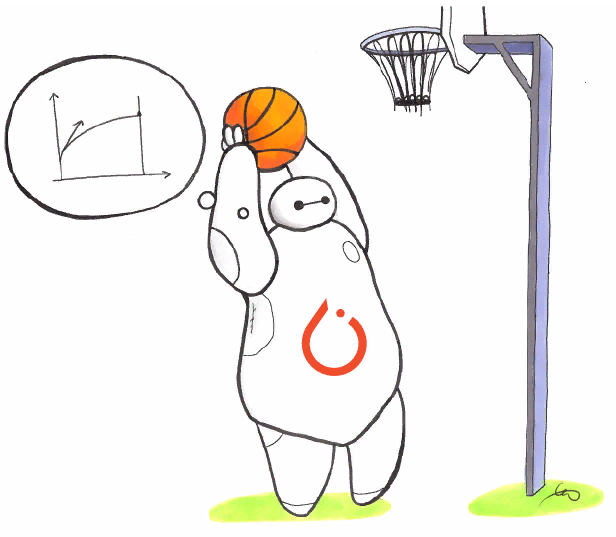

Чтобы решить эту проблему, мы собираемся использовать SB3 **PPO**.  [PPO (Proximal Policy Optimization) - это один из современных алгоритмов (SOTA) обучения с глубоким подкреплением, который изучается на этом курсе](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

PPO - это комбинация:
- *Метод обучения с подкреплением на основе ценностей*: изучение функции ценности действия, которая подскажет нам, какое **наиболее ценное действие следует предпринять, учитывая состояние и действие**.
- *Метод обучения с подкреплением на основе политики*: изучение политики, которая будет **давать нам распределение вероятностей по действиям**.

Stable-Baselines3 просты в настройке:

1️⃣ **Создается среда** (это было сделано выше)

2️⃣ Определяется модель, **которая будет использоваться, и создается экземпляр этой модели** `model = PPO("MlpPolicy")`

3️⃣ с помощью `model.learn` **обучается агент** и определяется количество временных шагов обучения

```
# Создается среда
env = gym.make('LunarLander-v2')

# Создается экземпляр агента
model = PPO('MlpPolicy', env, verbose=1)
# Обучается агент
model.learn(total_timesteps=int(2e5))
```

- ЗАДАЧА: Принять архитектуру политики PPO как MLPPolicy.
- Мы используем многослойный персептрон (MLPPolicy), потому что входные данные являются векторными, если бы у нас были кадры в качестве входных данных, мы бы использовали политику CnnPolicy (сверточные сети)

```
model = 
```

**РЕШЕНИЕ**

In [10]:
# РЕШЕНИЕ
# Добавляются некоторые параметры для ускорения обучения
model = PPO(
    policy = 'MlpPolicy',
    env = env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cuda device


# Обучение PPO агента 🏃

- Проведем обучение нашего агента на 1 000 000 временных шагов, с использованием графического процессора на Colab.
- Во время тренировки сделайте "перерыв, вы это заслужили"


**ЗАДАЧА:** тренировать агента в течение 1 000 000 временных шагов

**ЗАДАЧА:** Указать имя файла для модели и сохраните модель в файле

**РЕШЕНИЕ**

In [ ]:
# SOLUTION
# Train it for 1,000,000 timesteps
model.learn(total_timesteps=2000000)
# Save the model
model_name = "ppo-LunarLander-v2"
model.save(model_name)

## Оценка агента 📈

- Теперь, когда наш агент по посадке на Луну обучен 🚀 , нам нужно **проверить его работоспособность**.
- Stable-Baselines 3 предоставляет метод для этого: `evaluate_policy`.
- Чтобы заполнить эту часть, нужно проверить [документацию](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- На следующем шаге мы увидим **как автоматически оценивать вашего агента и делиться им, чтобы участвовать в таблице лидеров, но пока давайте сделаем это сами**


💡 Когда вы оцениваете своего агента, вам следует не использовать свою среду обучения, а создать среду оценки.

In [12]:
# ЗАДАЧА: Оценить агента
# Создать новую среду для оценки
eval_env = gym.make("LunarLander-v2")

# Оцените модель с помощью 10 эпизодов оценки и deterministic=True
mean_reward, std_reward = evaluate_policy (model, eval_env, n_eval_episodes=10, deterministic=True)

# Распечатайте результаты
print(mean_reward, std_reward )

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


278.15164825014926 17.829866716800566


РЕШЕНИЕ

In [13]:
#@title
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=288.36 +/- 21.095877693126443


**ОТ АВТОРА:** - В моем случае я получил скупую награду - это `200.20 +/- 20.80 `после тренировки в течение 1 миллиона шагов, что означает, что наш агент лунного спускаемого аппарата готов приземлиться на Луну".

## Публикация обученной модели на хабе 🔥
Теперь, когда получены хорошие результаты после обучения, можно опубликовать данную обученную модель на хабе 🤗 с помощью одной строки кода.

📚 Документация библиотек 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Вот пример модельной карты (с космическими захватчиками):

Используя `package_to_hub`, **можно оцениваеть, записывать повтор, генерировать карточку модели обученного агента и отправлять ее в центр**.

Таким образом можно:
- **продемонстрировать выполненную работу** 🔥
- **визуализировать, как ваш агент играет** 👀
- **поделиться с сообществом агентом, которым могут пользоваться другие** 💾
- получить доступ к таблице лидеров 🏆 , чтобы увидеть, насколько хорошо работает обученный агент по сравнению с другими моделями ** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

Чтобы иметь возможность поделиться своей моделью с сообществом, необходимо выполнить еще три шага:

1️⃣ (если это еще не сделано) создайте учетную запись в HF ➡ https://huggingface.co/join

2️⃣ Войдите в систему, а затем нужно сохранить свой токен аутентификации с веб-сайта Hugging Face.
- Создайте новый токен (https://huggingface.co/settings/tokens ) **с ролью записи**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg " alt="Создать токен HF">

- Скопируйте токен
- Запустите ячейку ниже и вставьте токен

In [21]:
notebook_login()
!git config --global credential.helper store

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.huggingface/token
Login successful


Если не использовать записную книжку Google Colabora Jupyter, то нужно вместо этого использовать команду:

 `huggingface-cli login`

3️⃣ Теперь мы готовы отправить нашего обученного агента в "Концентратор", используя функцию `package_to_hub()`

Давайте заполним функцию `package_to_hub`:
- `модель`: наша обученная модель.
- `имя_модели`: имя обученной модели, которую мы определили в `model_save`
- `model_architecture`: архитектура модели, которую мы использовали: в нашем случае PPO
- `env_id`: имя среды, в нашем случае `LunarLander-v2`
- `eval_env`: среда оценки, определенная в eval_env
- `repo_id`: имя репозитория Hugging Face Hub, который будет создан/обновлен `(repo_id = {username}/{repo_name})`

💡 **Хорошее имя - {username}/{model_architecture}-{env_id}**

- `commit_message`: сообщение о фиксации

In [22]:
import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

## ЗАДАЧА: Определите repo_id
## repo_id - это идентификатор хранилища моделей из Hugging Face Hub (repo_id = {организация}/{имя_представителя}, например ThomasSimonini/ppo-LunarLander-v2
repo_id = "Art-phys/ppo-LunarLander-2M-v2"

# ЗАДАЧА: Определите имя среды
env_id = "LunarLander-v2"

# ЗАДАЧА: Определите архитектуру модели, которую мы использовали
model_architecture = "PPO"

## ЗАДАЧА: Определить сообщение о фиксации
commit_message = "Upload PPO LunarLander-v2 trained agent"

# Создать среду оценки
eval_env = DummyVecEnv([lambda: gym.make(env_id)])

# метод сохраните, оцените, сгенерируйте карточку модели и запишите видео-повтор вашего агента, прежде чем отправлять репо в центр
package_to_hub(model=model, # Наша обученная модель
               model_name=model_name, # Имя нашей обученной модели 
               model_architecture=model_architecture, # Архитектура модели, которую мы использовали: в нашем случае PPO
               env_id=env_id, # Название среды
               eval_env=eval_env, # Среда оценки
               repo_id=repo_id, # идентификатор хранилища моделей из Hugging Face Hub (repo_id = {organization}/{repo_name}, например ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

# Примечание: если после запуска функции package_to_hub и это приводит к проблеме перебазирования, пожалуйста, запустите следующий код
# cd <path_to_repo> && git add . && git commit -m "Add message" && git pull 
# И не забудьте сделать "git push" в конце, чтобы перенести изменения в концентратор.

ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.


/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Saving video to /tmp/tmp8091nelu/-step-0-to-step-1000.mp4
ℹ Pushing repo Art-phys/ppo-LunarLander-2M-v2 to the Hugging Face
Hub
ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/Art-phys/ppo-LunarLander-2M-v2/tree/main/


'https://huggingface.co/Art-phys/ppo-LunarLander-2M-v2/tree/main/'

**Решение**

In [ ]:
import gym

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

# PLACE the variables you've just defined two cells above
# Define the name of the environment
env_id = "LunarLander-v2"

# TODO: Define the model architecture we used
model_architecture = "PPO"

## Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
## CHANGE WITH YOUR REPO ID
repo_id = "ThomasSimonini/ppo-LunarLander-v2" # Change with your repo id, you can't push with mine 😄

## Define the commit message
commit_message = "Upload PPO LunarLander-v2 trained agent"

# Create the evaluation env
eval_env = DummyVecEnv([lambda: gym.make(env_id)])

# PLACE the package_to_hub function you've just filled here
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model 
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

Поздравляю 🥳 Вы только что обучили и загрузили свой первый обучающий агент с глубоким подкреплением. Приведенный выше скрипт должен был отображать ссылку на репозиторий моделей, например https://huggingface.co/osanseviero/test_sb3 . Когда вы переходите по этой ссылке, вы можете:
* смотрить предварительный просмотр видео вашего агента справа.
* нажмите "Файлы и версии", чтобы просмотреть все файлы в репозитории.
* нажмите "Использовать в стабильных базовых линиях 3", чтобы получить фрагмент кода, показывающий, как загрузить модель.
* карточка модели (`README.md ` файл), который дает описание модели

Под капотом концентратор использует репозитории на основе git (не волнуйтесь, если вы не знаете, что такое git), что означает, что вы можете обновлять модель новыми версиями по мере экспериментов и улучшения вашего агента.

Сравните результаты вашего Lunar Lander-v2 с вашими одноклассниками, используя таблицу лидеров 🏆  👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

## Загрузите сохраненную модель лунного посадочного модуля из центра 🤗
Благодаря [ironbar](https://github.com/ironbar) за вклад.

Загрузить сохраненную модель из концентратора действительно просто.

Необходимо перейти https://huggingface.co/models?library=stable-baselines3, чтобы просмотреть список всех сохраненных моделей Stable-baselines 3.
1. Вы выбираете один из них и копируете его repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/copy-id.png" alt="Copy-id"/>

2. Тогда нам просто нужно использовать `load_from_hub` с:
- `repo_id`
- Имя файла: сохраненная модель внутри репозитория и ее расширение (*.zip)

In [ ]:
from huggingface_sb3 import load_from_hub
repo_id = "Classroom-workshop/assignment2-omar" # repo_id
filename = "ppo-LunarLander-v2.zip" # модель имя_файла.zip

# Когда модель была обучена на Python 3.8  the pickle protocol равен 5
# Но для Python 3.6, 3.7 используют протокол 4
# Для того, чтобы получить совместимость, нужно:
# 1. Установить pickle5 (мы сделали это в начале colab)
# 2. Создать пользовательский пустой объект, который мы передаем в качестве параметра PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

Оценка этого агента:

In [ ]:
#@title
eval_env = gym.make("LunarLander-v2")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

## Некоторые дополнительные вопросы 🏆
Лучший способ научиться **- это попробовать что-то самостоятельно**! Как вы видели, у нынешнего агента дела идут не очень хорошо. В качестве первого предложения вы можете потренироваться при большем количестве шагов. Пройдя 1 000 000 шагов, мы увидели отличные результаты!

В [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard ) вы найдете своих агентов. Сможешь ли ты добраться до вершины?

Вот несколько идей для достижения этого:
* Тренируйте больше шагов
* Попробуйте разные гиперпараметры `PPO`. Вы можете увидеть их на https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters .
* Проверьте документацию [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html ) и попробуйте другие модели, такие как DQN.
* **Разместите свою новую обученную модель** на хабе 🔥

**Сравните результаты ваших LunarLander-V2 с одноклассниками** используя [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Высадка на Луну кажется вам слишком скучной? Попробуйте **изменить окружающую среду**, почему бы не использовать MountainCar-v0, CartPole-v1 или CarRacing-v0? Проверьте, как они работают [используя документацию тренажерного зала](https://www.gymlibrary.dev/) и получайте удовольствие 🎉 .

Поздравляю с окончанием этой главы! Она была большой, **и в ней было много информации.**

Если вы все еще чувствуете себя "сбитым с толку" всеq этой информацией...это совершенно нормально! **Это было то же самое для меня и для всех людей, которые изучали RL.**

Найдите время, чтобы по-настоящему **усвоить материал, прежде чем продолжить и попробовать дополнительные задачи**. Важно овладеть этими элементами и иметь прочную основу.

Естественно, в ходе курса мы снова будем использовать и более подробно объяснять эти термины, но **лучше хорошо разобраться в них сейчас, прежде чем переходить к следующим главам.**

В следующий раз, в бонусном блоке 1, вы научите собаку Хагги приносить палку.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/huggy.jpg " alt="Обнимашки"/>

## Продолжай учиться 🤗